# Choix intertemporel

Modèle simple à deux périodes 

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

Revenu des deux périodes donnés par $y_0$ et $y_1$ alors que le facteur d'escompte est donné par $\delta$. Utilité a une forme connue: 

$$ u(C) = \frac{C^{1-\tfrac{1}{\sigma}}-1}{1-\tfrac{1}{\sigma}} $$

Nous verrons que $\sigma$ est l'elasticité de substitution intertemporelle. 

In [3]:
y0 = 50e3
y1 = 25e3
delta = 0.95
sigma = 2.0
r = 0.03

Fonction d'utilité et utilité marginale

In [23]:
def u(cons, sigma):
  if sigma!=1.0:
    return (cons**(1.0-1/sigma)-1.0)/(1-1/sigma)
  else :
    return np.log(cons)

def mu(cons,sigma):
  if sigma!=1.0:
    return cons**(-1/sigma)
  else :
    return 1/cons

Utilité escompté en prenant en compte la contrainte intertemporelle

In [8]:
def Du(cons,delta,sigma,y0,y1,r):
  return u(cons,sigma) + delta*u((1+r)*(y0-cons)+y1,sigma)

On peut regarder comment ce comporte cette fonction de $C_1$. 

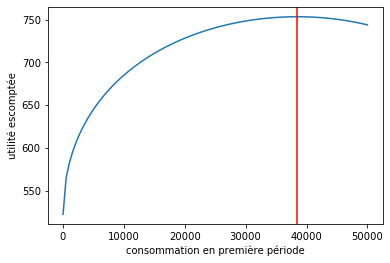

In [9]:
gridc = np.linspace(0.1,y0-0.1,100)
plt.figure()
Dus = [Du(c,delta,sigma,y0,y1,r) for c in gridc]
iopt = np.argmax(Dus)
copt = gridc[iopt]
plt.plot(gridc,Dus)
plt.axvline(x=copt,color='r')
plt.xlabel('consommation en première période')
plt.ylabel('utilité escomptée')
plt.show()

## Résoudre l'équation d'Euler

Pour trouver les consommations optimales, trouvons: 

$$ u'(C_0) = R\delta u'((1+r)(y_0-C_0)+y_1) $$ 



In [10]:
from scipy.optimize import bisect

In [12]:
def euler(cons,delta,sigma,y0,y1,r):
    mu1 = mu(cons,sigma)
    mu2 = mu((1+r)*(y0-cons)+y1,sigma)
    return mu1 - (1+r)*delta*mu2

In [14]:
euler(39e3,delta,sigma,y0,y1,r)

-6.99753269455955e-05

In [15]:
copt = bisect(euler,y0*0.01,0.99*y0,args=(delta,sigma,y0,y1,r))
copt 

38491.2971302977

In [16]:
sopt = y0 - copt
sopt

11508.702869702298

## Changement de taux d'intérêt

En prenant le log de la condition d'Euler et en faisant une première dérivée, on a: 

$$ \frac{\partial{\ln C}}{\partial{\ln r}} = \sigma $$ 

Donc l'élasticité intertemporelle de substitution (EIS) gouverne la substitution quand $r$ change. Si $r$ augmente, l'effet de substitution intertemporel est d'augmenter la consumption à la deuxième période (augmenter $C_1$ relatif à $C_0$). Mais il y a aussi un effet revenu. Une augmentation de $r$ augmente le revenu total à vie. Ceci augmente $C_0$ et $C_1$. Ainsi, l'effet total est indéterminé. 

In [17]:
def optsave(delta,sigma,y0,y1,r):
  copt = bisect(euler,y0*0.01,0.99*y0,args=(delta,sigma,y0,y1,r))
  return y0 - copt

In [18]:
rs = np.linspace(0.01,0.1,100)
saves = [optsave(delta,sigma,y0,y1,r) for r in rs]

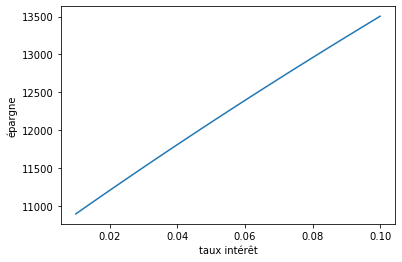

In [20]:
plt.figure()
plt.plot(rs,saves)
plt.xlabel('taux intérêt')
plt.ylabel('épargne')
plt.show()

Pour différentes valeurs de $\sigma$. 

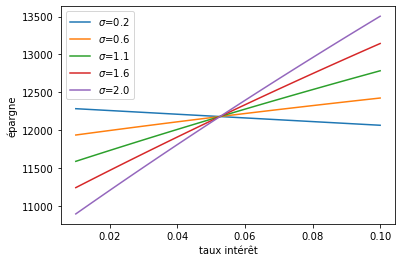

In [22]:
sigmas = np.linspace(0.2,2.0,5)
plt.figure()
for s in sigmas:
  saves = [optsave(delta,s,y0,y1,r) for r in rs]
  plt.plot(rs,saves,label='$\sigma$='+str(np.round(s,1)))
plt.xlabel('taux intérêt')
plt.ylabel('épargne')
plt.legend()
plt.show()

Plus la EIS est élevée, plus la réaction sera positive. Cette élasticité est aussi importante pour prévoir effet d'une taxe sur l'épargne. Cette taxe découragement l'épargne quand $\sigma$ est élevé et encouragement l'épargne quand $\sigma$ est faible. 